In [54]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import pandas as pd
import seaborn as sns
from matplotlib import cm
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix
from sklearn.manifold import LocallyLinearEmbedding, MDS, Isomap, TSNE

In [55]:
# Get characteristics of dataset
df = pd.read_csv('result.csv')
types = df['bug type'].unique().tolist()
types.remove('Bee & Bumblebee')
print(types)

['Bee', 'Butterfly', 'Hover fly', 'Wasp', 'Dragonfly', 'Bumblebee']


In [56]:
feat_names = df.columns.tolist()
feat_names.remove('species')
feat_names.remove('bug type')
print(feat_names)

['sym_index', 'Median_R', 'Median_G', 'Median_B', 'Std_R', 'Std_G', 'Std_B', 'Area']


C:\Users\arthu\AppData\Local\Temp\ipykernel_23372\486305102.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Area', y='bug type', palette='magma')


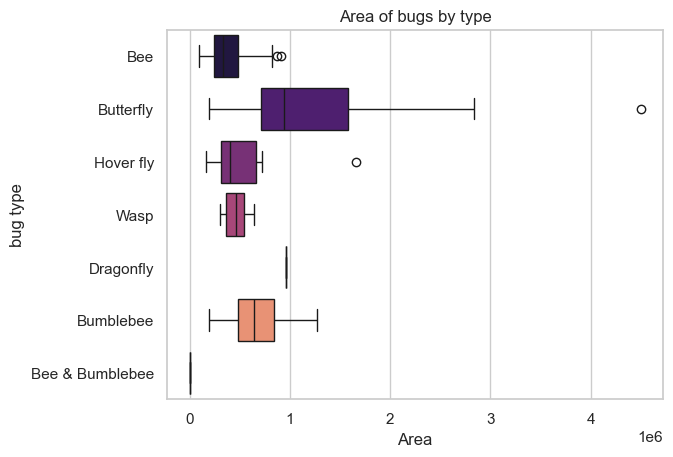

In [57]:
sns.boxplot(data=df, x='Area', y='bug type', palette='magma')
plt.title('Area of bugs by type')
plt.grid(visible=True, axis='x')
plt.show()

In [58]:
df = df[df['bug type'] != 'Bee & Bumblebee']
df_grouped_med = df.groupby('bug type')[['Median_R', 'Median_G', 'Median_B']].mean().reset_index()
df_grouped_std = df.groupby('bug type')[['Std_R', 'Std_G', 'Std_B']].mean().reset_index()

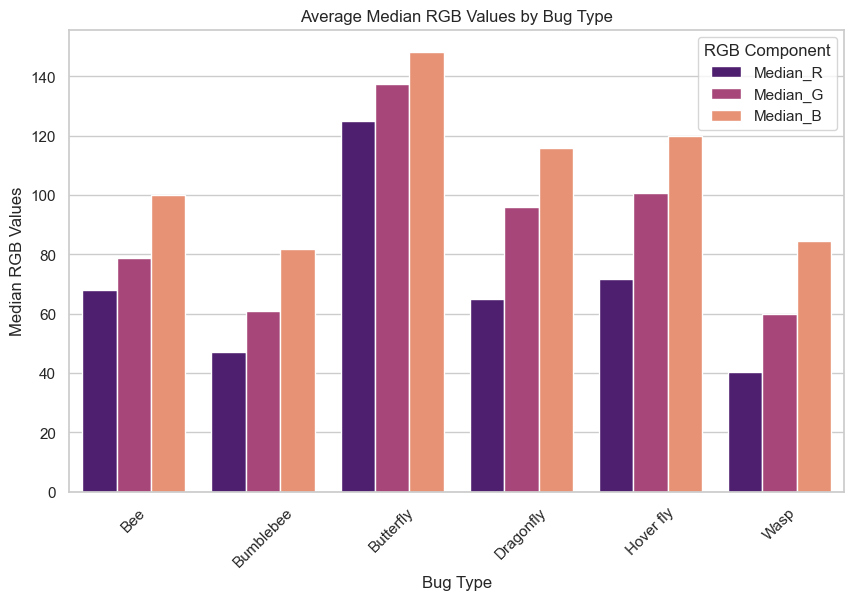

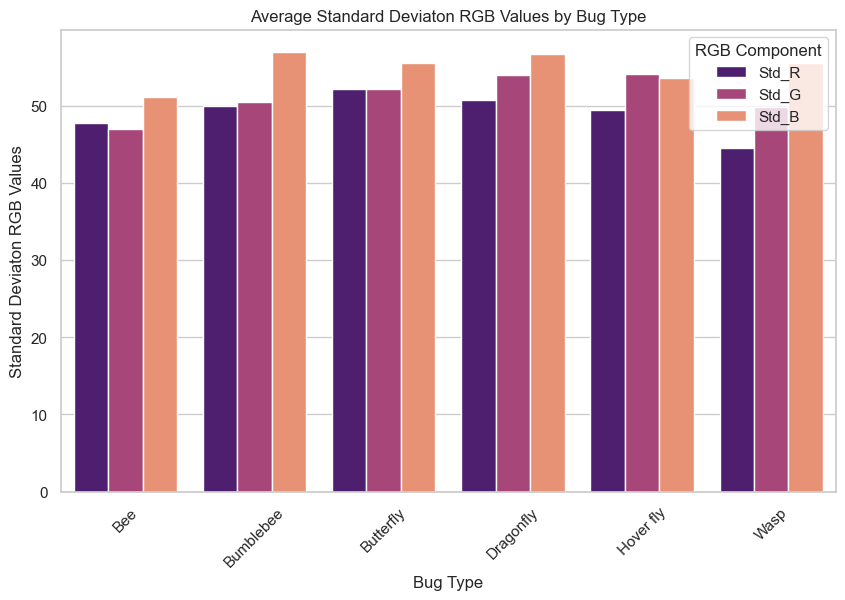

In [59]:
def plot_rgb_values(df, op):
    df_melted = pd.melt(df, id_vars=['bug type'], var_name='RGB Component', value_name='Median Value')
    
    plt.figure(figsize=(10, 6))
    sns.barplot(data=df_melted, x='bug type', y='Median Value', hue='RGB Component', palette='magma')
    plt.title(f'Average {op} RGB Values by Bug Type')
    plt.xlabel('Bug Type')
    plt.grid(visible=True, axis='y')
    plt.ylabel(f'{op} RGB Values')
    plt.xticks(rotation=45)
    plt.show()

# Call the function for each dataframe
plot_rgb_values(df_grouped_med, 'Median')
plot_rgb_values(df_grouped_std, 'Standard Deviaton')

<u> Histogram for standard deviation does not have added value. Might not include it in final paper. </u>

In [74]:
#PCA projection of the features

scaler = StandardScaler()
dfn = df.copy()
dfn[feat_names] = scaler.fit_transform(dfn[feat_names])
dfn.dropna(inplace=True)
df.dropna(inplace=True)

In [67]:
pca = PCA(n_components=2)
df_pca = pca.fit_transform(dfn[feat_names])

In [73]:
df_components= pd.DataFrame(df_pca, columns=["PC1", "PC2"])
df_components.head()

,PC1,PC2
0,-2.404631,-0.450534
1,-2.827720,-0.981944
2,0.969304,1.099130
3,-1.449975,-0.904426
4,1.937282,1.199244


In [69]:
pc1 = round(pca.explained_variance_ratio_[0] * 100,2)
pc2 = round(pca.explained_variance_ratio_[1] * 100,2)
[pc1, pc2]

[39.28, 28.97]

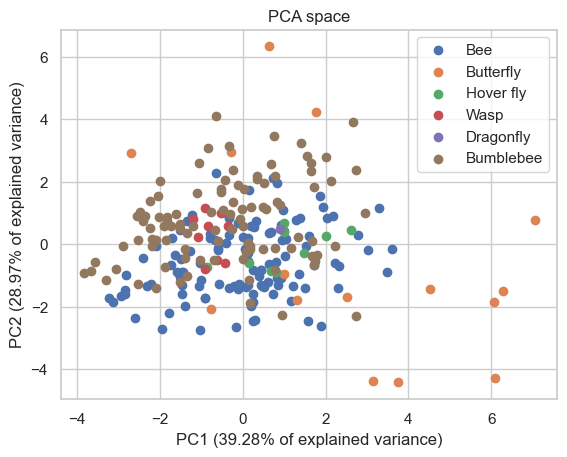

In [77]:
fig, ax = plt.subplots();
for type in types:
    ax.scatter(df_pca[df["bug type"]==type, 0], df_pca[df["bug type"]==type, 1],label=type);

ax.legend();
ax.set_xlabel("PC1 ({0}% of explained variance)".format(pc1, fontsize=12));
ax.set_ylabel("PC2 ({0}% of explained variance)".format(pc2, fontsize=12));
ax.set_title('PCA space', fontsize=12);

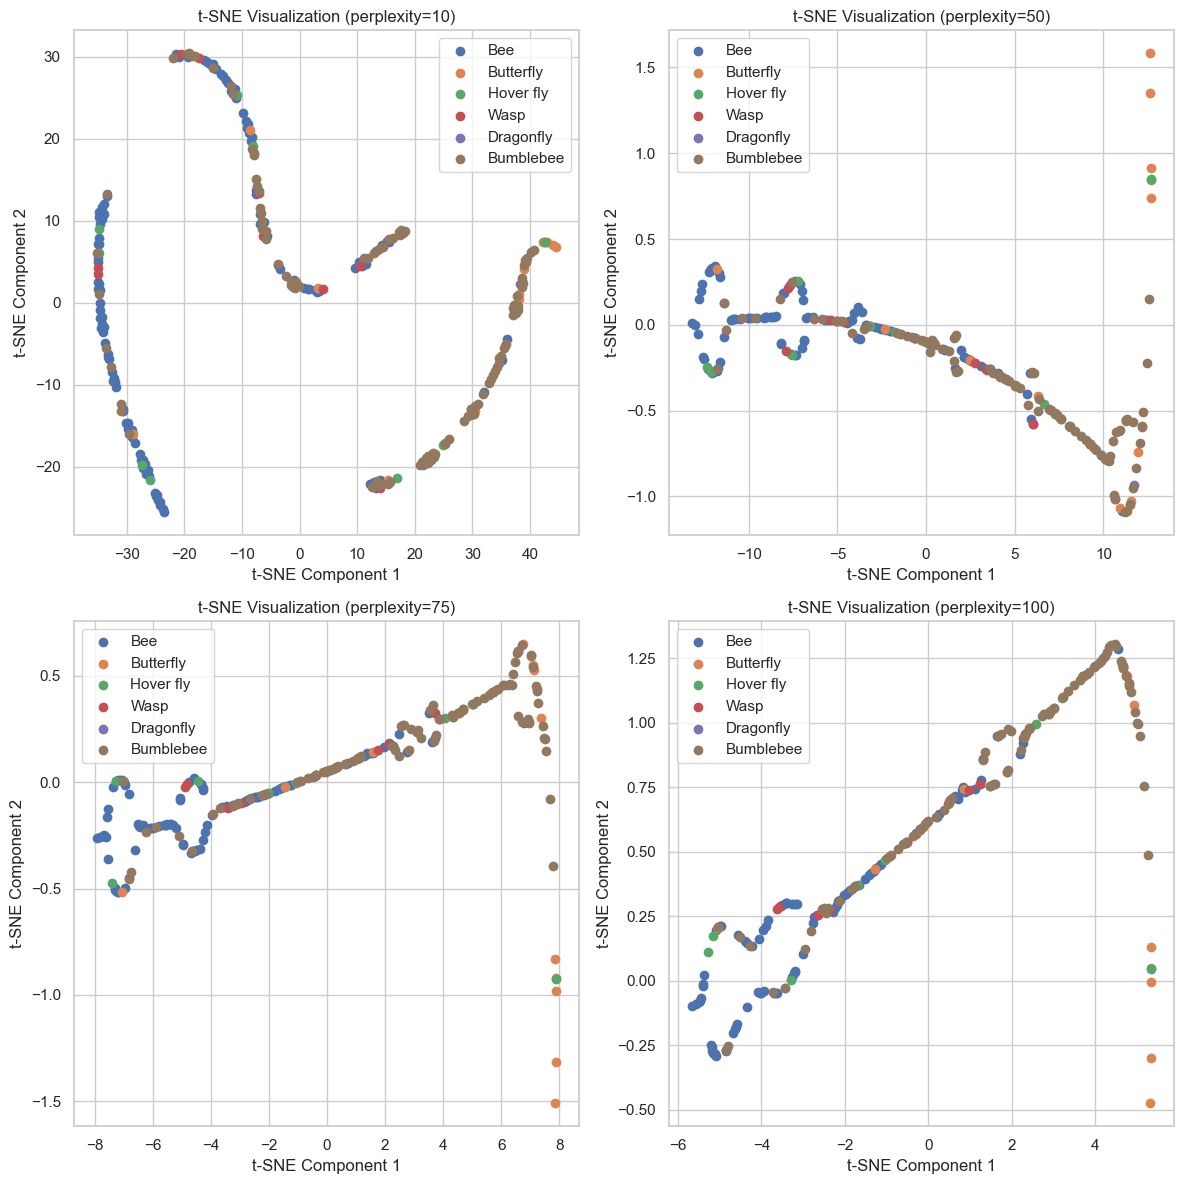

In [78]:
# t-SNE visualisation 

perplexities = [10, 50, 75, 100]

fig, axs = plt.subplots(2, 2, figsize=(12, 12))
axs = axs.flatten()

for i, perplexity in enumerate(perplexities):
    tsne = TSNE(n_components=2, random_state=0, perplexity=perplexity)
    df_tsne = tsne.fit_transform(df[feat_names])

    ax = axs[i]
    for type in types:
        ax.scatter(df_tsne[df['bug type'] == type, 0], df_tsne[df['bug type'] == type, 1], label=type)

    ax.legend()
    ax.set_xlabel("t-SNE Component 1")
    ax.set_ylabel("t-SNE Component 2")
    ax.set_title(f"t-SNE Visualization (perplexity={perplexity})")

plt.tight_layout()
plt.show()

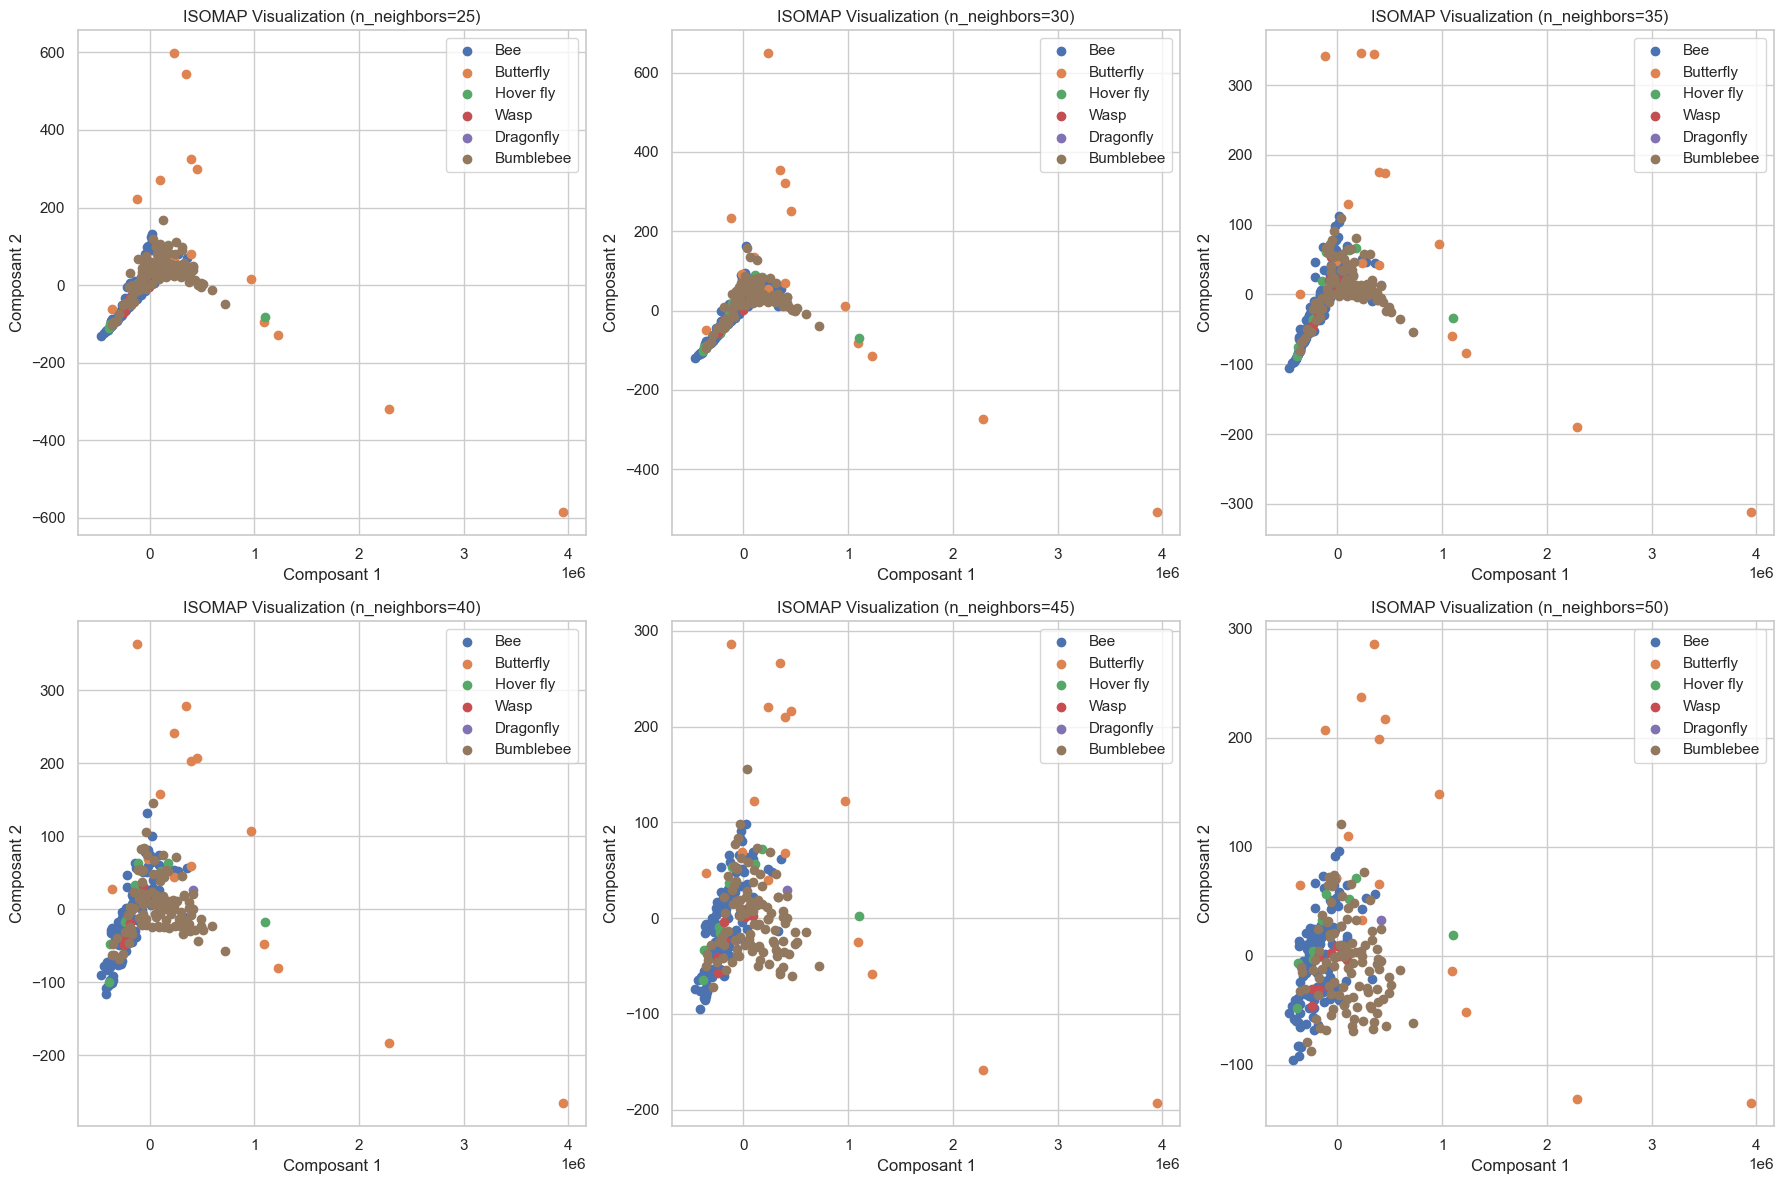

In [82]:
n_neighbors_values = [25,30,35,40,45,50]

fig, axs = plt.subplots(2, 3, figsize=(18, 12))
axs = axs.flatten()

for i, n_neighbors in enumerate(n_neighbors_values):
    isomap = Isomap(n_neighbors=n_neighbors, n_components=2)
    df_isomap = isomap.fit_transform(df[feat_names])

    ax = axs[i]
    for type in types:
        ax.scatter(df_isomap[df['bug type'] == type, 0], df_isomap[df['bug type'] == type, 1], label=type)

    ax.legend()
    ax.set_xlabel("Composant 1")
    ax.set_ylabel("Composant 2")
    ax.set_title(f"ISOMAP Visualization (n_neighbors={n_neighbors})")

plt.tight_layout()
plt.show()

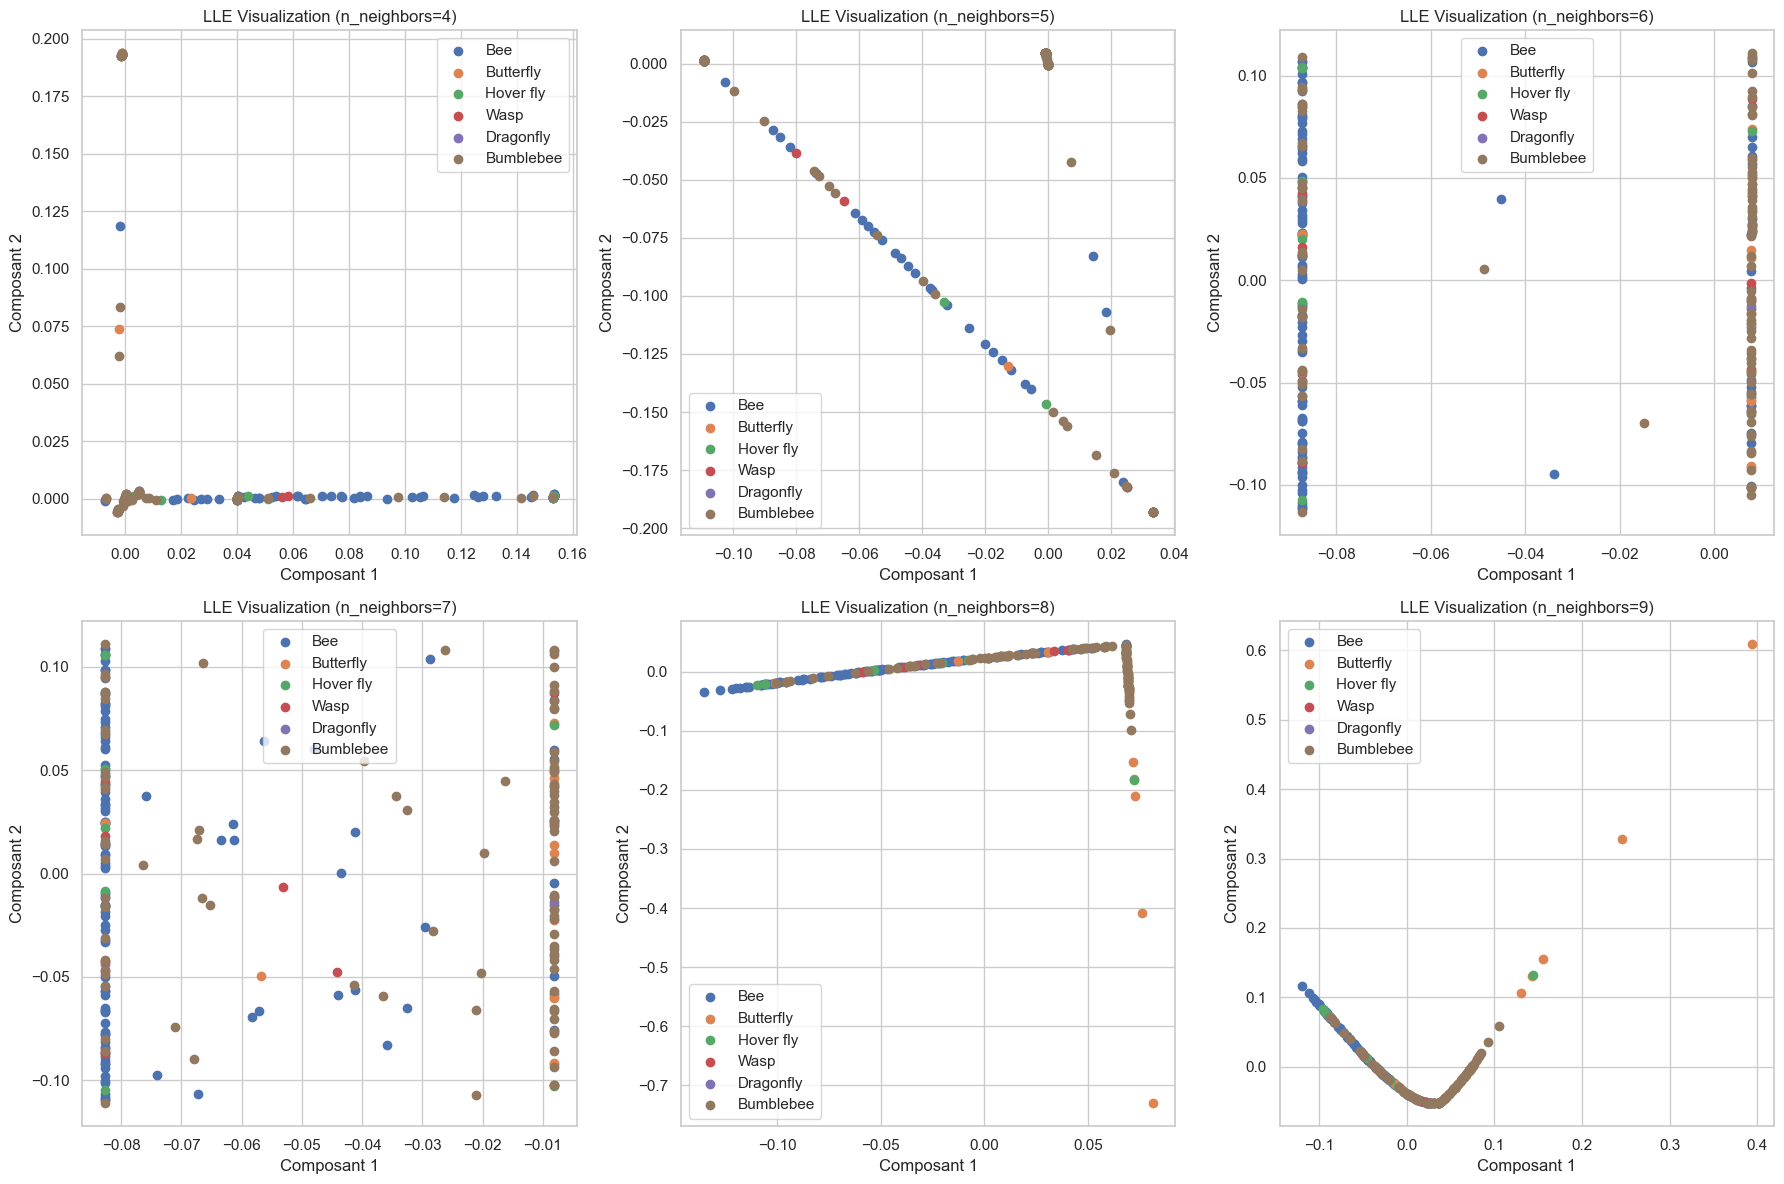

In [88]:
# LLE visualisation
n_neighbors_values = [4,5,6,7,8,9]

fig, axs = plt.subplots(2, 3, figsize=(18, 12))
axs = axs.flatten()

for i, n_neighbors in enumerate(n_neighbors_values):
    lle = LocallyLinearEmbedding(n_neighbors=n_neighbors, n_components=2, random_state=0)
    df_reduced = lle.fit_transform(df[feat_names])

    ax = axs[i]
    for type in types:
        ax.scatter(df_reduced[df['bug type'] == type, 0], df_reduced[df['bug type'] == type, 1], label=type)

    ax.legend()
    ax.set_xlabel("Composant 1")
    ax.set_ylabel("Composant 2")
    ax.set_title(f"LLE Visualization (n_neighbors={n_neighbors})")

plt.tight_layout()
plt.show()


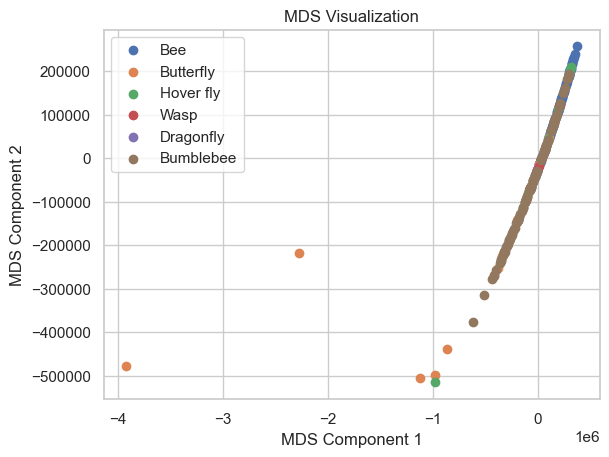

In [89]:
# MDS

mds = MDS(n_components=2, random_state=0)
df_mds = mds.fit_transform(df[feat_names])
 
fig, ax = plt.subplots()
for type in types:
    ax.scatter(df_mds[df['bug type'] == type, 0], df_mds[df['bug type'] == type, 1], label=type)

ax.legend()
ax.set_xlabel("MDS Component 1")
ax.set_ylabel("MDS Component 2")
ax.set_title('MDS Visualization')

plt.show()
        